# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Anisa Bintang Maharani
- **Email:** anisabintangmaharani@gmail.com
- **ID Dicoding:** abeendicular

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Berapa rata-rata waktu pengiriman dari pesanan dibuat hingga diterima pelanggan, dan bagaimana variasinya di setiap kategori produk dalam 1 tahun terakhir?
- Pertanyaan 2 : Produk atau kategori apa yang memberikan kontribusi pendapatan terbesar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import datetime as dt


## Data Wrangling

### Gathering Data

In [2]:
# Path ke folder data
data_path = "data"

# Membaca file ke dalam DataFrames
df_items = pd.read_csv(os.path.join(data_path, "olist_order_items_dataset.csv"))
df_reviews = pd.read_csv(os.path.join(data_path, "olist_order_reviews_dataset.csv"))
df_orders = pd.read_csv(os.path.join(data_path, "olist_orders_dataset.csv"))
df_products = pd.read_csv(os.path.join(data_path, "olist_products_dataset.csv"))
df_geolocation = pd.read_csv(os.path.join(data_path, "olist_geolocation_dataset.csv"))
df_sellers = pd.read_csv(os.path.join(data_path, "olist_sellers_dataset.csv"))
df_payments = pd.read_csv(os.path.join(data_path, "olist_order_payments_dataset.csv"))
df_customers = pd.read_csv(os.path.join(data_path, "olist_customers_dataset.csv"))
df_category = pd.read_csv(os.path.join(data_path, "product_category_name_translation.csv"))

In [3]:
# Merging Dataframes
df = df_orders.merge(df_items, on='order_id', how='inner')
df = df.merge(df_payments, on='order_id', how='inner', validate='m:m')
df = df.merge(df_reviews, on='order_id', how='inner')
df = df.merge(df_products, on='product_id', how='inner')
df = df.merge(df_customers, on='customer_id', how='inner')
df = df.merge(df_sellers, on='seller_id', how='inner')

**Insight:**
- Data yang tersedia dapat digunakan untuk menjawab pertanyaan bisnis, tetapi butuh penanganan lebih lanjut

### Assessing Data

In [4]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350,maua,SP


In [5]:
df.shape

(117329, 39)

In [6]:
#Periksa tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [7]:
# Ubah Format Data
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp'
]

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

In [8]:
#Periksa null value
df.isna().sum()


order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             103437
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
product_category_name              1695


In [9]:
#Analisis deskriptif
df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,...,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
count,117329,117314,116094,114858,117329,117329.000000,117329,117329.000000,117329.000000,117329.000000,...,117329,115634.000000,115634.000000,115634.000000,117309.000000,117309.000000,117309.000000,117309.000000,117329.000000,117329.000000
mean,2017-12-30 10:29:39.749081856,2017-12-30 21:58:19.189721344,2018-01-03 12:09:47.466820096,2018-01-12 23:40:18.665604608,2018-01-23 07:08:36.977047296,1.194121,2018-01-06 02:01:32.273274624,120.524349,20.027514,1.094452,...,2018-01-15 03:28:45.726341888,48.768018,785.802861,2.205528,2110.763062,30.254456,16.612476,23.071452,35060.118112,24450.781955
min,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,1.000000,2016-09-19 00:15:34,0.850000,0.000000,1.000000,...,2016-10-16 03:20:17,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000
25%,2017-09-11 16:37:08,2017-09-12 04:35:32.500000,2017-09-14 20:27:55.249999872,2017-09-23 00:28:20.500000,2017-10-03 00:00:00,1.000000,2017-09-18 15:55:47,39.900000,13.080000,1.000000,...,2017-09-25 23:24:55,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,6429.000000
50%,2018-01-18 09:42:57,2018-01-18 14:16:46,2018-01-23 18:50:08,2018-02-01 16:15:39.500000,2018-02-14 00:00:00,1.000000,2018-01-25 09:09:32,74.900000,16.280000,1.000000,...,2018-02-03 23:11:32,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,13660.000000
75%,2018-05-03 19:53:54,2018-05-04 04:11:43.500000,2018-05-07 15:25:00,2018-05-15 14:03:23.500000,2018-05-25 00:00:00,1.000000,2018-05-10 03:31:06,134.900000,21.180000,1.000000,...,2018-05-17 16:20:40,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58770.000000,28035.000000
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,29.000000,...,2018-10-29 12:27:35,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,99730.000000
std,NaN,NaN,NaN,NaN,NaN,0.684225,NaN,182.944843,15.828077,0.731174,...,NaN,10.033831,652.382965,1.717783,3785.128931,16.177519,13.452625,11.745875,29849.496175,27582.364358


In [10]:
#Cek duplikasi
df.duplicated().sum()

0

In [11]:
# Validasi Nilai Logis
# Jumlah baris dengan tanggal pengiriman tidak logis
invalid_dates = df[df['order_delivered_customer_date'] < df['order_purchase_timestamp']]
print(f"\nJumlah baris dengan tanggal pengiriman tidak logis: {len(invalid_dates)}")

# Jumlah baris dengan freight_value lebih besar dari price
invalid_freight = df[df['freight_value'] > df['price']]
print(f"\nJumlah baris dengan freight_value lebih besar dari price: {len(invalid_freight)}")


Jumlah baris dengan tanggal pengiriman tidak logis: 0

Jumlah baris dengan freight_value lebih besar dari price: 4352


In [12]:
invalid_freight.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
45,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14,2,be03d93320192443b8fa24c0ca6ead98,...,16.0,16.0,13.0,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,9350,maua,SP
125,a59244db9c00a55a76803349b21f244d,b82f3c3423d8ffd289353c912be332f0,delivered,2018-07-24 02:10:35,2018-07-25 02:35:15,2018-07-25 14:49:00,2018-07-30 17:50:44,2018-08-08,1,6e423c2d28bfb207e1fd1d6e1df84721,...,20.0,10.0,18.0,3e332338454c5752a0ff8cb3858fabfb,13484,limeira,SP,31570,belo horizonte,SP
141,6e8e751584b3e3141e3e3c39f71408c2,85442da9cbd169529443a1d088a56346,delivered,2018-06-27 11:23:15,2018-06-27 11:35:17,2018-06-28 14:54:00,2018-07-11 23:34:40,2018-07-24,2,6e423c2d28bfb207e1fd1d6e1df84721,...,20.0,10.0,18.0,397017a63f9c38e08a205d660a5d3019,78010,cuiaba,MT,31570,belo horizonte,SP
409,b25e83776a0bf6440214b6258416e4e1,0e9a1a195d9e737e602ffc9cfe19053a,delivered,2018-07-26 17:26:17,2018-07-27 09:10:15,2018-07-30 09:15:00,2018-08-06 20:44:41,2018-08-15,1,0f461354af6a2189ef983f8e7a3390b5,...,19.0,11.0,13.0,1a195982d360650b48c729ef241d8150,35519,nova serrana,MG,13482,limeira,SP
1972,27a54410628f54cb15b276a47a14c7d7,e0760d6de182bf294c6a3896fab8d14e,delivered,2018-01-19 17:33:17,2018-01-19 17:50:19,2018-01-22 22:18:35,2018-02-02 20:12:33,2018-02-20,1,3b88c6a09d4f61f0566c39ed139fb5e2,...,20.0,20.0,20.0,6fd6f55fd011cbfd8f5de03f2a9c28dd,64390,demerval lobao,PI,31842,belo horizonte,MG


### **Insight Dataset**

#### **1. Informasi Umum Dataset**
- **Jumlah data**: 117,329 baris (entri).
- **Jumlah fitur**: 39 kolom (variabel).
- **Kolom dengan format data tidak sesuai**: Beberapa kolom berformat `object`, seharusnya `datetime`:
  - `order_purchase_timestamp`
  - `order_approved_at`
  - `order_delivered_carrier_date`
  - `order_delivered_customer_date`
  - `order_estimated_delivery_date`
  - `shipping_limit_date`
  - `review_creation_date`
  - `review_answer_timestamp`

#### **2. Analisis Missing Values**
- **Kolom dengan Missing Values Signifikan**:
  - `review_comment_title`: 103,437 nilai kosong.
  - `review_comment_message`: 67,650 nilai kosong.
  - `order_delivered_customer_date`: 2,471 nilai kosong.
  - `order_delivered_carrier_date`: 1,235 nilai kosong.
  - `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`: masing-masing 1,695 nilai kosong.

- **Kolom dengan Missing Values Minor**:
  - `order_approved_at`: 15 nilai kosong.
  - `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`: masing-masing 20 nilai kosong.

#### **3. Analisis Statistik Deskriptif**
- **Outliers**:
  - Terdapat outliers signifikan pada kolom:
    - Harga produk (`price`)
    - Berat produk (`product_weight_g`)
    - Nilai pembayaran (`payment_value`)
    - Ongkir (`freight_value`)
  - Outliers ini perlu ditelusuri lebih lanjut untuk memahami karakteristik data.

- **Data Anomali**:
  - **Nilai nol** pada kolom seperti `freight_value` dan `payment_value` perlu dievaluasi validitasnya.
  - Dimensi produk (`product_length_cm`, `product_height_cm`, `product_width_cm`) memiliki nilai ekstrem yang bisa mencerminkan:
    - Produk unik.
    - Kesalahan data.

- **Freight Value Lebih Besar dari Price**:
  - **Kemungkinan penyebab**:
    - Barang murah dengan berat tinggi sehingga ongkos kirim lebih mahal dari harga barang.
    - Kesalahan data pada kolom `freight_value` atau `price`.
  - **Contoh kasus**: Order ID `5f49f31e537f8f1a496454b48edbe34d` memiliki `freight_value` lebih besar dari `price`.
  - Distribusi lokasi juga berperan, misalnya pengiriman antar kota (contoh: Sao Paulo → Maua, Limeira → Belo Horizonte) dapat menyebabkan ongkir tinggi.

- **Kesimpulan**: Kasus ini dapat dianggap wajar terutama untuk barang murah yang berat, sehingga tidak menjadi masalah besar.

- **Review**:
  - Mayoritas ulasan menunjukkan kepuasan pelanggan.
  - Ulasan dengan skor rendah (1 atau 2) perlu dianalisis untuk meningkatkan pengalaman pelanggan.

#### **4. Analisis Data Duplikat**
- **Hasil analisis**: Tidak ada data duplikat.

#### **5. Catatan Tambahan**
- Kemungkinan penyebab anomali:
  - Kesalahan input data.
  - Freight value mungkin dihitung untuk total berat barang yang lebih tinggi dibandingkan harga barang murah.

### Cleaning Data

In [13]:
# Penanganan Kolom Waktu
df = df[~df['order_approved_at'].isna()].copy()  # Hapus baris dengan nilai null pada order_approved_at
df.loc[df['order_delivered_customer_date'].isna(), 'order_delivered_customer_date'] = df['order_estimated_delivery_date']

# Penanganan Kolom Ulasan
df.loc[df['review_comment_message'].isna(), 'review_comment_message'] = 'No Comment'
df.loc[df['review_comment_title'].isna(), 'review_comment_title'] = 'No Title'

# Penanganan Kolom Produk
df.loc[df['product_category_name'].isna(), 'product_category_name'] = 'Unknown'
df.loc[df['product_name_lenght'].isna(), 'product_name_lenght'] = df['product_name_lenght'].mean()
df.loc[df['product_description_lenght'].isna(), 'product_description_lenght'] = df['product_description_lenght'].mean()
df.loc[df['product_photos_qty'].isna(), 'product_photos_qty'] = df['product_photos_qty'].mean()

# Penanganan Kolom Dimensi Produk
df.loc[df['product_weight_g'].isna(), 'product_weight_g'] = df['product_weight_g'].median()
df.loc[df['product_length_cm'].isna(), 'product_length_cm'] = df['product_length_cm'].median()
df.loc[df['product_height_cm'].isna(), 'product_height_cm'] = df['product_height_cm'].median()
df.loc[df['product_width_cm'].isna(), 'product_width_cm'] = df['product_width_cm'].median()


# Penanganan order_delivered_carrier_date, replace dengan order_approved_at
if 'order_delivered_carrier_date' in df.columns:
    df['order_delivered_carrier_date'].fillna(df['order_approved_at'], inplace=True)


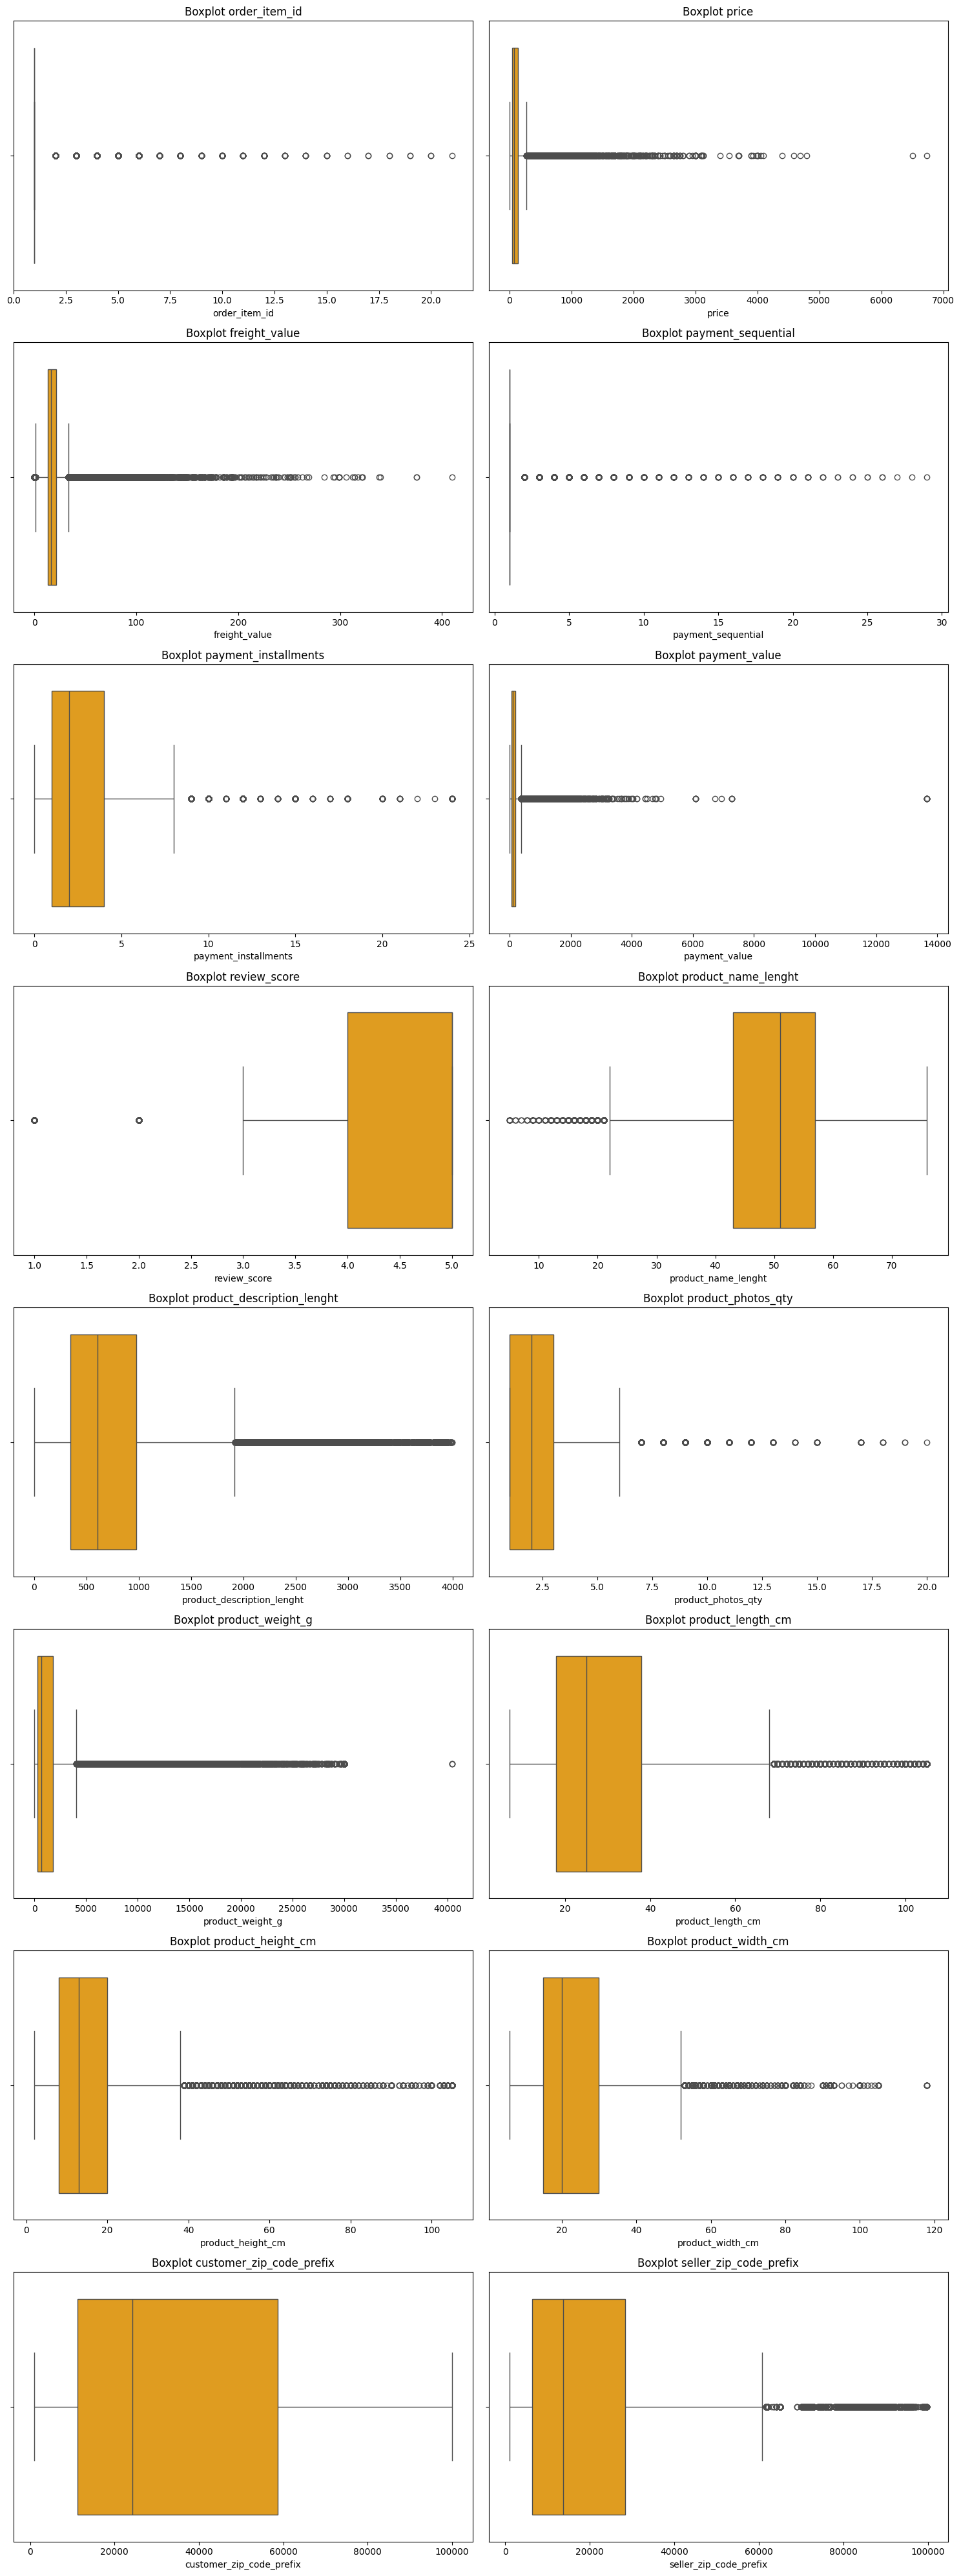

In [14]:
# Memeriksa Outlier dengan Boxplot
# Kolom numerik
kolom_numerik = df.select_dtypes(include=['float64', 'int64']).columns
jumlah_kolom = len(kolom_numerik)
kolom_per_baris = 2  # Menentukan jumlah kolom per baris untuk plot
jumlah_baris = (jumlah_kolom + kolom_per_baris - 1) // kolom_per_baris  # Menghitung jumlah baris plot

# Membuat subplots
fig, axes = plt.subplots(nrows=jumlah_baris, ncols=kolom_per_baris, figsize=(15, jumlah_baris * 5))
axes = axes.flatten()  # Meratakan array axes untuk iterasi

# Membuat boxplot untuk setiap kolom
for i, col in enumerate(kolom_numerik):
    sns.boxplot(data=df, x=col, ax=axes[i], color='orange')  # Menambahkan parameter warna oranye
    axes[i].set_title(f'Boxplot {col}')

# Menyembunyikan subplot kosong jika jumlah kolom tidak genap
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

**Insight:**

### **Strategi Penanganan Missing Values**

#### **1. Kolom Waktu**
- **`order_approved_at`**: Baris dengan nilai kosong dihapus karena pesanan dianggap gagal.
- **`order_delivered_customer_date`**: Nilai kosong diisi dengan nilai dari `order_estimated_delivery_date`.

#### **2. Kolom Ulasan**
- **`review_comment_message`**: Nilai kosong diisi dengan **"No Comment"**.
- **`review_comment_title`**: Nilai kosong diisi dengan **"No Title"**.

#### **3. Kolom Produk**
- **`product_category_name`**: Nilai kosong diisi dengan **"Unknown"**.
- Kolom numerik lainnya (`product_name_lenght`, `product_description_lenght`, `product_photos_qty`):
  - Nilai kosong diisi dengan **rata-rata**.

#### **4. Kolom Dimensi Produk**
- Kolom dimensi seperti `product_length_cm`, `product_height_cm`, `product_width_cm`, dan `product_weight_g`:
  - Nilai kosong diisi dengan **median** untuk mengurangi dampak outliers.

#### **5. Kolom `order_delivered_carrier_date`**
- Nilai kosong dianggap logis dan diisi dengan asumsi bahwa kurir mengambil barang segera setelah pesanan disetujui (`order_approved_at`).

---

### **Catatan Outliers**
- Meskipun terdapat outliers pada beberapa kolom seperti harga (`price`), berat produk (`product_weight_g`), nilai pembayaran (`payment_value`), dan ongkir (`freight_value`), pada konteks e-commerce, semua nilai ini dianggap **logis** sehingga tidak memerlukan penanganan khusus.

## Exploratory Data Analysis (EDA)

In [15]:
sns.set_theme(style="whitegrid", palette="Oranges") #Menentukan style


### Explore ...

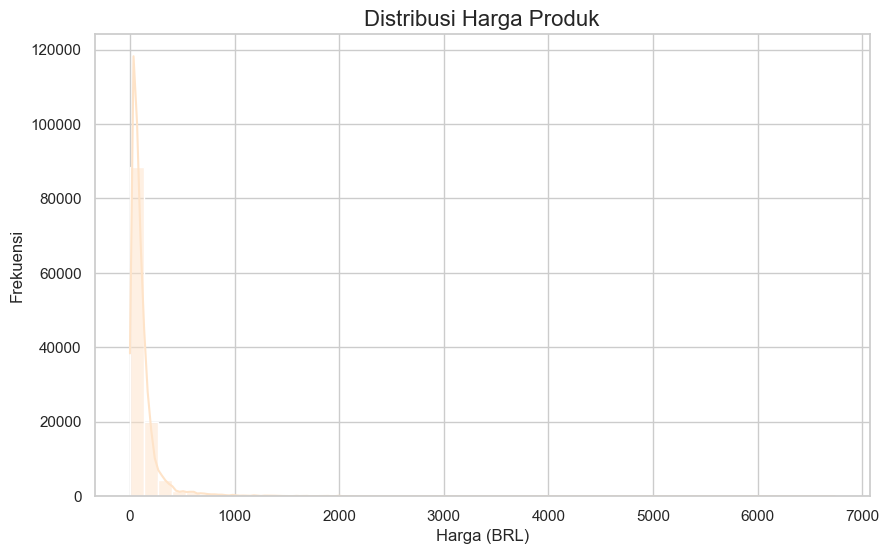

In [16]:
# 1. Distribusi Harga Produk
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribusi Harga Produk', fontsize=16)
plt.xlabel('Harga (BRL)')
plt.ylabel('Frekuensi')
plt.show()

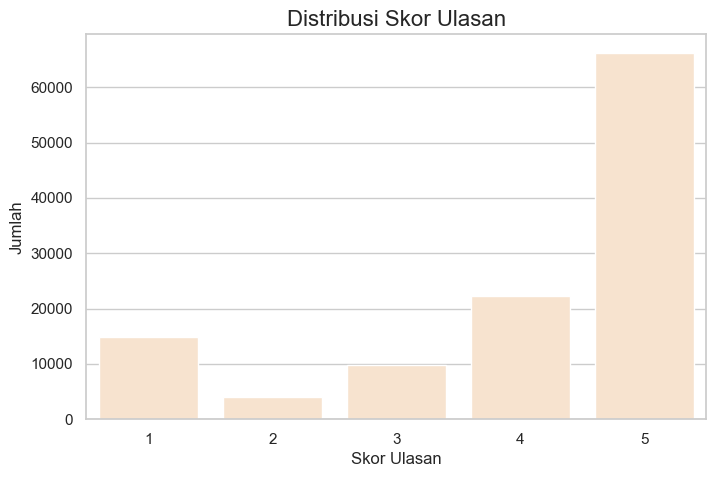

In [17]:
# 2. Skor Ulasan
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='review_score')
plt.title('Distribusi Skor Ulasan', fontsize=16)
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah')
plt.show()

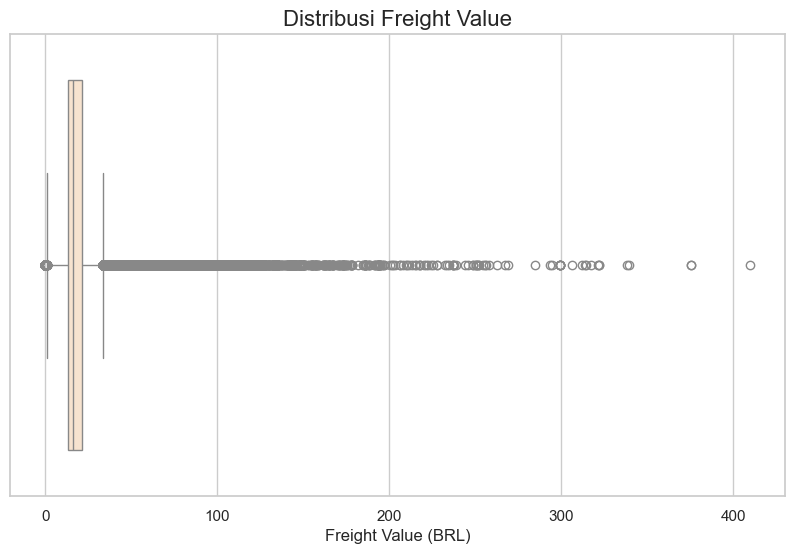

In [18]:
# 3. Distribusi Freight Value
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='freight_value')
plt.title('Distribusi Freight Value', fontsize=16)
plt.xlabel('Freight Value (BRL)')
plt.show()

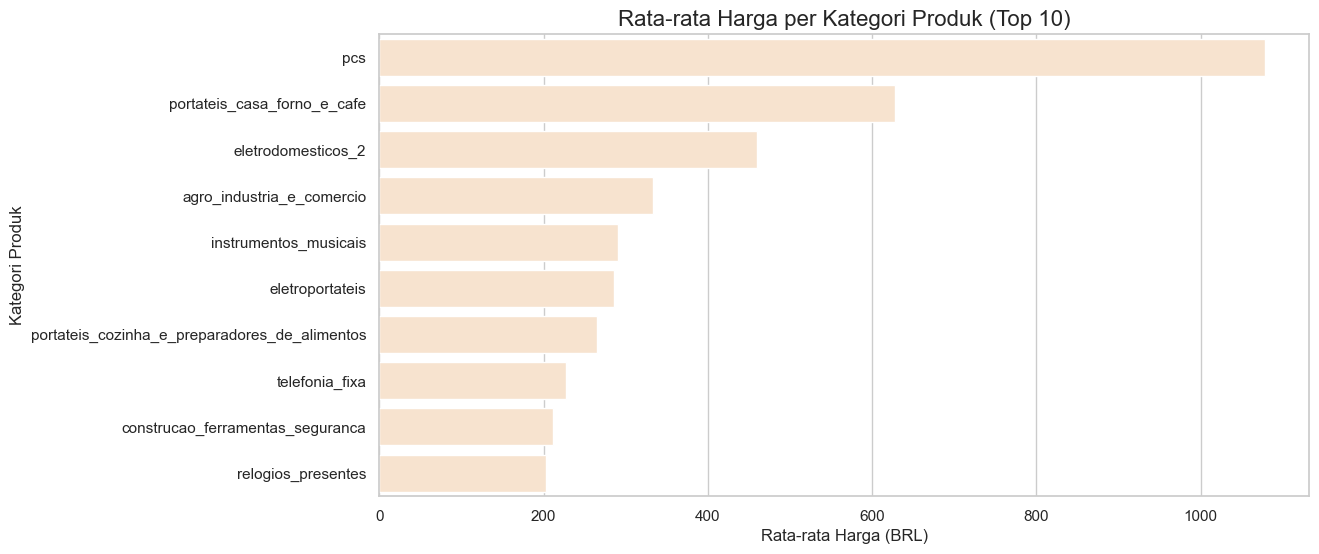

In [19]:
# 4. Rata-rata Harga per Kategori Produk
avg_price_per_category = df.groupby('product_category_name')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_category.values, y=avg_price_per_category.index)
plt.title('Rata-rata Harga per Kategori Produk (Top 10)', fontsize=16)
plt.xlabel('Rata-rata Harga (BRL)')
plt.ylabel('Kategori Produk')
plt.show()

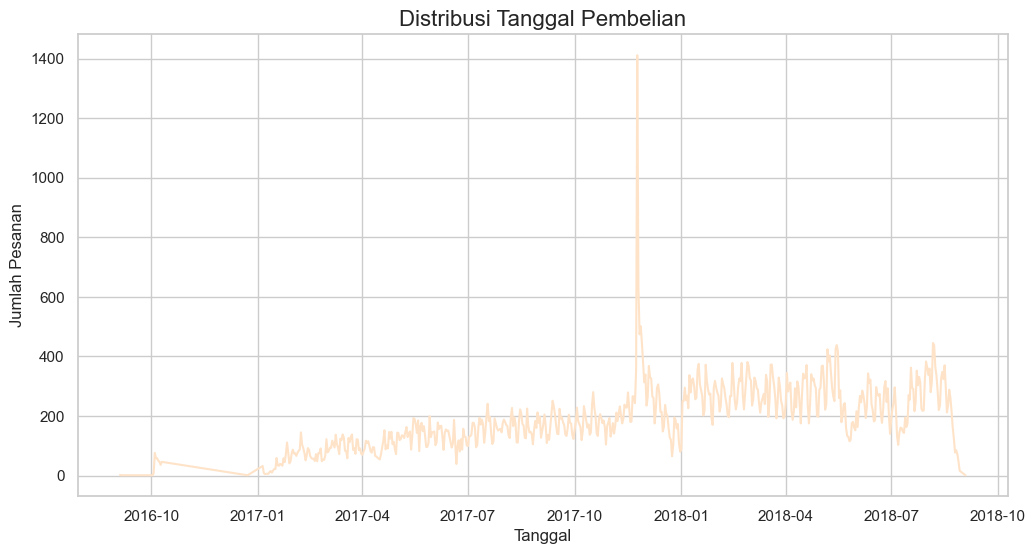

In [20]:
# 5. Distribusi Tanggal Pembelian
plt.figure(figsize=(12, 6))
df['order_purchase_timestamp'].dt.date.value_counts().sort_index().plot()
plt.title('Distribusi Tanggal Pembelian', fontsize=16)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.show()

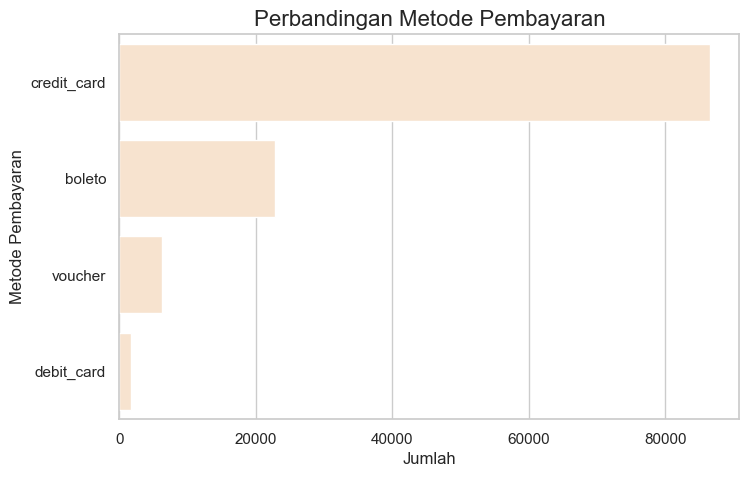

In [21]:
# 6. Perbandingan Metode Pembayaran
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='payment_type', order=df['payment_type'].value_counts().index)
plt.title('Perbandingan Metode Pembayaran', fontsize=16)
plt.xlabel('Jumlah')
plt.ylabel('Metode Pembayaran')
plt.show()

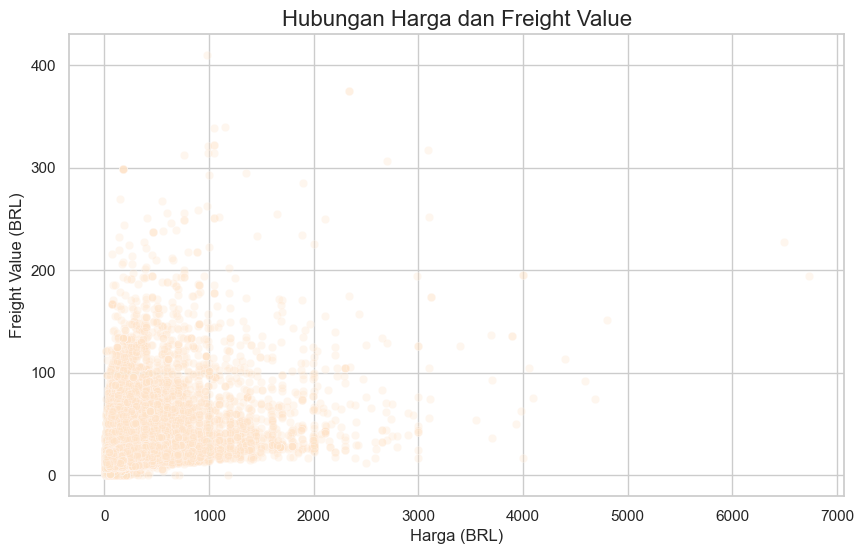

In [22]:
# 7. Hubungan Harga dan Freight Value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='freight_value', alpha=0.3)
plt.title('Hubungan Harga dan Freight Value', fontsize=16)
plt.xlabel('Harga (BRL)')
plt.ylabel('Freight Value (BRL)')
plt.show()

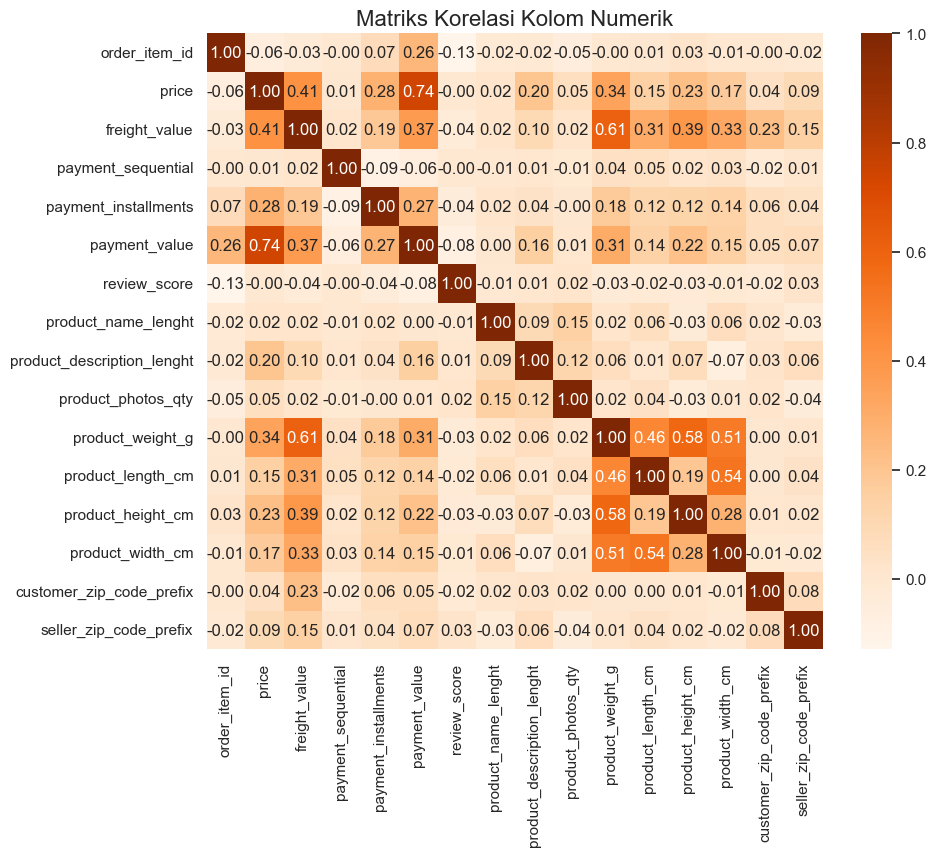

In [23]:
def plot_correlation_heatmap(df):
    """
    Fungsi untuk menghitung dan memvisualisasikan korelasi antar kolom numerik menggunakan heatmap.
    """
    # Pilih kolom numerik
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Hitung matriks korelasi
    correlation_matrix = df[numeric_cols].corr()
    
    # Plot heatmap korelasi
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Oranges", cbar=True, square=True)
    plt.title('Matriks Korelasi Kolom Numerik', fontsize=16)
    plt.show()

# Panggil fungsi dengan dataframe Anda
plot_correlation_heatmap(df)

### **Insight EDA**

#### **1. Distribusi Harga Produk**
- Sebagian besar produk memiliki harga di bawah **500 BRL**.
- Produk dengan harga sangat tinggi (> 500 BRL) jarang ditemukan, menunjukkan fokus pasar pada produk dengan harga terjangkau.
- **Rekomendasi**: Optimalkan produk di kisaran harga rendah hingga menengah untuk menjangkau pasar yang lebih luas.

#### **2. Distribusi Skor Ulasan**
- Skor ulasan **5** mendominasi, menunjukkan tingkat kepuasan pelanggan yang tinggi.
- Skor rendah (1 dan 2) tetap ada, mengindikasikan adanya pelanggan yang tidak puas.
- **Rekomendasi**: Analisis lebih mendalam terhadap ulasan dengan skor rendah untuk meningkatkan kualitas layanan dan produk.

#### **3. Distribusi Freight Value**
- Sebagian besar nilai ongkos kirim berada di bawah **50 BRL**, namun terdapat banyak outlier di atas **100 BRL**.
- Ongkos kirim yang tinggi kemungkinan terkait dengan pengiriman jarak jauh atau barang berat.
- **Rekomendasi**: Pantau dan analisis outlier untuk meningkatkan efisiensi logistik serta transparansi biaya pengiriman.

#### **4. Rata-rata Harga per Kategori Produk (Top 10)**
- Kategori **pcs** memiliki rata-rata harga tertinggi, diikuti oleh **portateis_casa_forno_e_cafe**.
- Perbedaan harga antar kategori menunjukkan bahwa beberapa kategori menargetkan segmen pasar premium.
- **Rekomendasi**: Fokus pada kategori dengan harga tinggi untuk strategi pemasaran eksklusif.

#### **5. Distribusi Tanggal Pembelian**
- Lonjakan besar pesanan terjadi pada **Oktober 2017**, kemungkinan dipicu oleh promosi atau diskon besar.
- Setelah lonjakan tersebut, tren pesanan kembali stabil dengan fluktuasi musiman.
- **Rekomendasi**: Analisis lonjakan pesanan pada Oktober 2017 untuk mereplikasi keberhasilan promosi di masa mendatang.

#### **6. Perbandingan Metode Pembayaran**
- **Credit card** adalah metode pembayaran yang paling sering digunakan, jauh lebih tinggi dibandingkan metode lain seperti **boleto** dan **voucher**.
- **Debit card** jarang digunakan, menunjukkan preferensi rendah terhadap metode ini.
- **Rekomendasi**: Tingkatkan promosi untuk metode pembayaran alternatif seperti **boleto** atau **voucher** untuk menarik segmen pasar yang berbeda.

#### **7. Hubungan Harga dan Freight Value**
- Tidak ada korelasi kuat antara **harga produk** dan **freight value**. Produk dengan ongkos kirim tinggi memiliki harga yang beragam.
- Freight value tetap signifikan meskipun harga produk rendah.
- **Rekomendasi**: Tinjau kembali struktur penetapan ongkos kirim, terutama untuk produk murah agar lebih kompetitif.

#### **8. Korelasi dan Hubungan Antar Variabel**
- **Freight Value** memiliki korelasi tinggi dengan **Product Weight** (0.61), menunjukkan barang yang lebih berat cenderung memiliki ongkos kirim lebih tinggi.
- **Total Value** berkorelasi signifikan dengan **Price** (0.74), menunjukkan hubungan langsung antara harga produk dan total nilai transaksi.
- **Dimensi Produk** seperti **Product Length**, **Height**, dan **Width** saling berkorelasi tinggi (> 0.50), mencerminkan hubungan antara dimensi fisik produk.
- **Review Score** tidak memiliki korelasi kuat dengan kolom lain, menunjukkan bahwa ulasan pelanggan dipengaruhi oleh faktor eksternal selain atribut produk atau transaksi.

#### **Kesimpulan dan Rekomendasi**
1. **Optimalisasi Ongkos Kirim**:
   - Fokus pada pengelolaan barang berat untuk mengurangi ongkos kirim.
   - Gunakan data dimensi produk untuk memperkirakan biaya logistik lebih akurat.
2. **Strategi Peningkatan Layanan**:
   - Analisis ulasan dengan skor rendah untuk meningkatkan pengalaman pelanggan.
3. **Promosi dan Strategi Pemasaran**:
   - Replikasi keberhasilan promosi Oktober 2017.
   - Targetkan kategori produk dengan harga tinggi untuk strategi pemasaran eksklusif.
   - Tingkatkan promosi untuk metode pembayaran alternatif.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Berapa rata-rata waktu pengiriman dari pesanan dibuat hingga diterima pelanggan, dan bagaimana variasinya di setiap kategori produk dalam 1 tahun terakhir?

asumsinya 1 tahun terakhir dihitung dari timestamp terakhir di dataset, bukan timestamp saat ini

In [ ]:
def delivery_time_analysis(df):
    """
    Analyze average delivery time by product category in the last year.
    """
    # Pastikan kolom waktu memiliki tipe datetime
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
    df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

    # Buat kolom delivery_time (selisih hari antara pengiriman dan pembelian)
    df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

    # Filter data untuk 1 tahun terakhir
    last_year_date = df['order_purchase_timestamp'].max() - pd.DateOffset(years=1)
    last_year_df = df[df['order_purchase_timestamp'] >= last_year_date]

    # Group by product category untuk menghitung rata-rata waktu pengiriman
    delivery_time_by_category = (
        last_year_df.groupby('product_category_name')['delivery_time']
        .mean()
        .sort_values(ascending=False)
        .reset_index()
    )

    # Visualisasi rata-rata waktu pengiriman per kategori
    fig_delivery = px.bar(
        delivery_time_by_category,
        x='delivery_time',
        y='product_category_name',
        color='delivery_time',
        color_continuous_scale='Oranges',
        title='Rata-rata Waktu Pengiriman per Kategori Produk (1 Tahun Terakhir)',
        labels={
            'delivery_time': 'Waktu Pengiriman (Hari)',
            'product_category_name': 'Kategori Produk'
        },
        orientation='h'
    )
    fig_delivery.update_layout(
        xaxis_title="Waktu Pengiriman Rata-rata (Hari)",
        yaxis_title="Kategori Produk",
        font=dict(size=12),
        showlegend=False
    )
    fig_delivery.show()

# Panggil fungsi untuk visualisasi
delivery_time_analysis(df)


### Pertanyaan 2: Produk atau kategori apa yang memberikan kontribusi pendapatan terbesar?

In [26]:
# Tambahkan kolom total_value jika belum ada
if 'total_value' not in df.columns:
    df['total_value'] = df['price'] + df['freight_value']

# Analisis kontribusi pendapatan dan performa produk
def revenue_and_performance_analysis(df):
    """
    Analyze revenue contribution, delivery time, and review scores by product category.
    """
    # Group by product category to calculate revenue, delivery time, and review score
    category_performance = (
        df.groupby('product_category_name')
        .agg({
            'total_value': 'sum',  # Total revenue
            'delivery_time': 'mean',  # Average delivery time
            'review_score': 'mean'  # Average review score
        })
        .sort_values('total_value', ascending=False)
        .reset_index()
    )
    
    # Visualisasi kontribusi pendapatan
    fig_revenue = px.bar(
        category_performance,
        x='total_value',
        y='product_category_name',
        color='total_value',
        color_continuous_scale='Oranges',
        title='Kontribusi Pendapatan per Kategori Produk',
        labels={'total_value': 'Total Pendapatan (BRL)', 'product_category_name': 'Kategori Produk'},
        orientation='h'
    )
    fig_revenue.update_layout(
        xaxis_title="Total Revenue (BRL)",
        yaxis_title="Product Category",
        font=dict(size=12),
        showlegend=False
    )
    fig_revenue.show()

    # Visualisasi waktu pengiriman vs skor ulasan
    fig_performance = px.scatter(
        category_performance,
        x='delivery_time',
        y='review_score',
        size='total_value',
        color='total_value',
        color_continuous_scale='Oranges',
        title='Waktu Pengiriman vs Skor Ulasan per Kategori Produk',
        labels={
            'delivery_time': 'Waktu Pengiriman (Hari)',
            'review_score': 'Skor Ulasan',
            'total_value': 'Pendapatan (BRL)'
        },
        hover_data=['product_category_name']
    )
    fig_performance.update_layout(
        xaxis_title="Delivery Time (Days)",
        yaxis_title="Review Score",
        font=dict(size=12),
        showlegend=True
    )
    fig_performance.show()

# Panggil fungsi untuk visualisasi
revenue_and_performance_analysis(df)


### **Insight 1: Waktu Pengiriman per Kategori**

#### **Kategori dengan Pengiriman Tercepat**
- Kategori seperti **pc_gamer** dan **portateis_cozinha_e_preparadores_de_alimentos** memiliki rata-rata waktu pengiriman yang lebih cepat (**di bawah 5 hari**).
- Hal ini mencerminkan efisiensi logistik untuk produk-produk dalam kategori tersebut.

#### **Kategori dengan Pengiriman Terlama**
- Kategori seperti **artigos_de_natal** dan **moveis_escritorio** memiliki waktu pengiriman rata-rata yang jauh lebih lama (**di atas 20 hari**).
- Faktor penyebab mungkin meliputi:
  - Ukuran barang yang besar.
  - Kompleksitas logistik.
  - Lokasi pengiriman yang jauh.

#### **Rekomendasi**
1. **Optimasi Logistik**:
   - Tingkatkan efisiensi logistik untuk kategori dengan pengiriman lambat, misalnya melalui optimisasi rute dan pengelolaan gudang.
2. **Informasi Transparan**:
   - Berikan estimasi waktu pengiriman yang jelas kepada pelanggan, terutama untuk kategori dengan waktu pengiriman lebih lama.
3. **Analisis Penyebab Keterlambatan**:
   - Identifikasi penyebab spesifik keterlambatan untuk kategori seperti **artigos_de_natal** yang mungkin dipengaruhi oleh faktor musiman atau kebutuhan stok.

---

### **Insight 2: Kategori dengan Kontribusi Pendapatan Tertinggi**

#### **Pendapatan Tertinggi**
- Kategori **"Beleza e Saúde" (Kecantikan dan Kesehatan)** merupakan penyumbang pendapatan tertinggi dengan total pendapatan lebih dari **1,4 juta BRL**.
- Kategori lain dengan kontribusi besar meliputi:
  - **"Informática Acessórios" (Aksesori Komputer)**.
  - **"Automotivo" (Otomotif)**.

#### **Performa Produk dalam Kategori Utama**
- Produk dalam kategori **"Beleza e Saúde"** memiliki:
  - Waktu pengiriman rata-rata: **11,7 hari**.
  - Skor ulasan rata-rata: **4,1**, menunjukkan performa yang baik meskipun waktu pengiriman relatif lama.

#### **Rekomendasi**
1. **Fokus Pemasaran**:
   - Prioritaskan strategi pemasaran untuk kategori produk dengan kontribusi besar seperti **"Beleza e Saúde"**, **"Informática Acessórios"**, dan **"Automotivo"**.
2. **Efisiensi Logistik**:
   - Tingkatkan efisiensi logistik untuk kategori dengan waktu pengiriman lama tanpa mengorbankan kualitas produk.
3. **Penguatan Brand**:
   - Manfaatkan kepuasan pelanggan yang tinggi (skor ulasan 4,1) untuk memperkuat citra brand pada kategori **"Beleza e Saúde"**.

## Analisis Lanjutan (Opsional)

## RFM Analysis

Tujuan: untuk membuat segmentasi pelanggan

In [27]:
# Step 1: Menghitung RFM
def calculate_rfm(df):
    """
    Menghitung nilai RFM (Recency, Frequency, Monetary) berdasarkan DataFrame input.

    Parameter:
    df : DataFrame
        DataFrame dengan kolom order_purchase_timestamp, customer_unique_id, dan total_value.

    Output:
    rfm : DataFrame
        DataFrame berisi customer_unique_id, recency, frequency, dan monetary.
    """
    # Pastikan kolom waktu memiliki format datetime
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

    # Hitung nilai recency
    snapshot_date = df['order_purchase_timestamp'].max()
    recency = df.groupby('customer_unique_id').order_purchase_timestamp.max().apply(lambda x: (snapshot_date - x).days)

    # Hitung nilai frequency
    frequency = df.groupby('customer_unique_id').order_id.nunique()

    # Hitung nilai monetary
    monetary = df.groupby('customer_unique_id').total_value.sum()

    # Gabungkan nilai RFM ke dalam DataFrame baru
    rfm = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary': monetary}).reset_index()

    return rfm

# Step 2: Menambahkan Skor dan Segmentasi
def add_rfm_scores_and_segment_manual(rfm):
    """
    Tambahkan skor RFM dan segmentasi pelanggan berdasarkan RFM.

    Parameter:
    rfm : DataFrame
        DataFrame dengan kolom customer_unique_id, recency, frequency, dan monetary.

    Output:
    rfm_segmented : DataFrame
        DataFrame dengan kolom tambahan R_Score, F_Score, M_Score, RFM_Segment, dan Customer_Segment.
    """
    try:
        # Copy DataFrame untuk menghindari overwrite
        rfm_segmented = rfm.copy()

        # Tentukan batas untuk skor RFM
        recency_bins = [0, 30, 90, 180, float('inf')]  # Recency dalam hari
        frequency_bins = [0, 1, 3, 5, float('inf')]    # Frequency
        monetary_bins = [0, 100, 500, 1000, float('inf')]  # Monetary

        # Buat skor RFM
        rfm_segmented['R_Score'] = pd.cut(
            rfm_segmented['recency'], bins=recency_bins, labels=[4, 3, 2, 1], right=False
        )
        rfm_segmented['F_Score'] = pd.cut(
            rfm_segmented['frequency'], bins=frequency_bins, labels=[1, 2, 3, 4], right=False
        )
        rfm_segmented['M_Score'] = pd.cut(
            rfm_segmented['monetary'], bins=monetary_bins, labels=[1, 2, 3, 4], right=False
        )

        # Kombinasi skor RFM
        rfm_segmented['RFM_Segment'] = (
            rfm_segmented['R_Score'].astype(str) +
            rfm_segmented['F_Score'].astype(str) +
            rfm_segmented['M_Score'].astype(str)
        )

        # Hitung RFM Score
        rfm_segmented['RFM_Score'] = (
            rfm_segmented[['R_Score', 'F_Score', 'M_Score']]
            .astype(int)
            .sum(axis=1)
        )

        # Segmentasi pelanggan berdasarkan RFM_Score
        def segment_customer(score):
            if score >= 9:
                return 'Best Customers'
            elif score >= 7:
                return 'Loyal Customers'
            elif score >= 5:
                return 'Potential Customers'
            else:
                return 'At Risk'

        rfm_segmented['Customer_Segment'] = rfm_segmented['RFM_Score'].apply(segment_customer)

        return rfm_segmented

    except Exception as e:
        print(f"Terjadi kesalahan: {e}")
        return None

# Menggunakan DataFrame yang sudah ada
# df adalah DataFrame Anda yang sudah didefinisikan

# Hitung nilai RFM
rfm = calculate_rfm(df)

# Tambahkan skor dan segmentasi pelanggan
rfm_segmented = add_rfm_scores_and_segment_manual(rfm)

# Tampilkan hasil segmentasi pelanggan
rfm_segmented


,customer_unique_id,recency,frequency,monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Customer_Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,2,2,2,222,6,Potential Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,2,2,1,221,5,Potential Customers
2,0000f46a3911fa3c0805444483337064,541,1,86.22,1,2,1,121,4,At Risk
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,1,2,1,121,4,At Risk
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,1,2,2,122,5,Potential Customers
...,...,...,...,...,...,...,...,...,...,...
94702,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,2067.42,1,2,4,124,7,Loyal Customers
94703,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58,1,2,1,121,4,At Risk
94704,ffff371b4d645b6ecea244b27531430a,572,1,112.46,1,2,2,122,5,Potential Customers
94705,ffff5962728ec6157033ef9805bacc48,123,1,133.69,2,2,2,222,6,Potential Customers


In [28]:
df.shape


(117314, 41)

## Analisis Geospatial (Distribusi lokasi pelanggan berdasarkan negara bagian)

Analisis ini bertujuan untuk meningkatkan efisiensi logistik dan membantu strategi pemasaran

C:\Users\anisa\AppData\Local\Temp\ipykernel_14672\1616507749.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




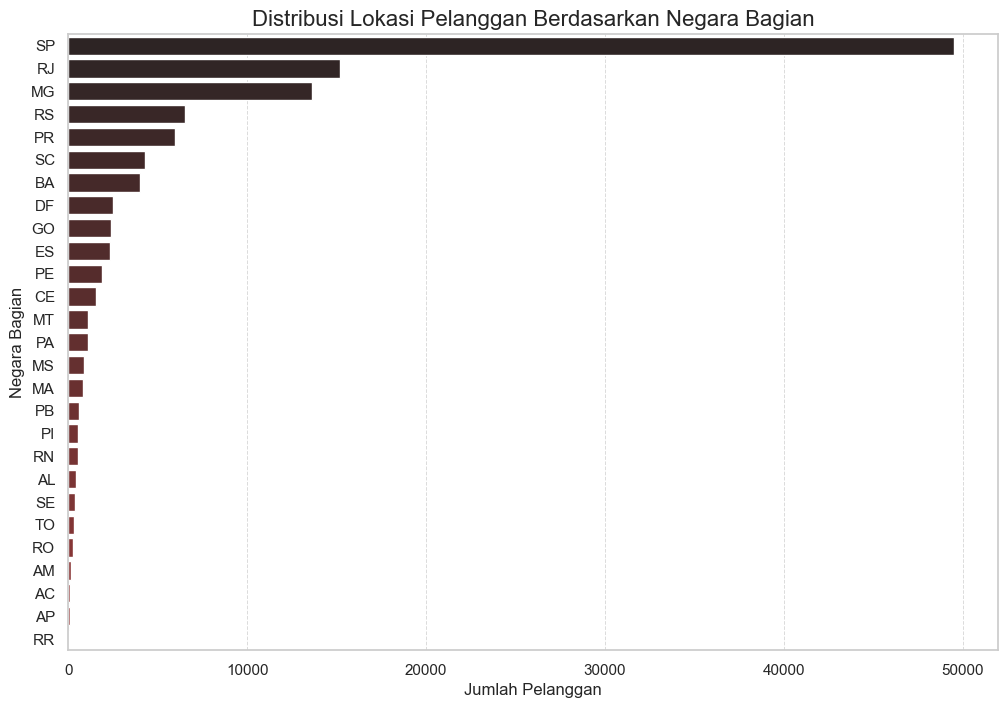

In [29]:
customer_location = df.groupby('customer_state').size().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
colors = sns.color_palette("dark:brown", len(customer_location))
sns.barplot(x=customer_location.values, y=customer_location.index, palette=colors)
plt.title("Distribusi Lokasi Pelanggan Berdasarkan Negara Bagian", fontsize=16)
plt.xlabel("Jumlah Pelanggan", fontsize=12)
plt.ylabel("Negara Bagian", fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()


## Conclusion

### **Kesimpulan untuk Pertanyaan 1: Waktu Pengiriman per Kategori**

1. **Efisiensi Logistik Berdasarkan Kategori**:
   - Kategori seperti **pc_gamer** dan **portateis_cozinha_e_preparadores_de_alimentos** menunjukkan efisiensi tinggi dengan waktu pengiriman rata-rata di bawah 5 hari.
   - Sebaliknya, kategori seperti **artigos_de_natal** dan **moveis_escritorio** membutuhkan waktu pengiriman yang jauh lebih lama (di atas 20 hari), kemungkinan disebabkan oleh ukuran barang, kompleksitas logistik, atau lokasi pengiriman.

2. **Peluang Peningkatan**:
   - **Optimalisasi Logistik**: Tingkatkan efisiensi logistik melalui optimasi rute dan pengelolaan gudang, khususnya untuk kategori dengan pengiriman lambat.
   - **Transparansi Informasi**: Berikan estimasi waktu pengiriman yang jelas, terutama untuk kategori yang membutuhkan waktu lebih lama.
   - **Analisis Penyebab**: Identifikasi penyebab spesifik keterlambatan, terutama untuk kategori musiman seperti **artigos_de_natal**.

---

### **Kesimpulan untuk Pertanyaan 2: Kategori dengan Kontribusi Pendapatan Tertinggi**

1. **Kontribusi Pendapatan**:
   - Kategori **"Beleza e Saúde"** memberikan kontribusi pendapatan terbesar (lebih dari 1,4 juta BRL), meskipun waktu pengiriman rata-ratanya relatif lama (11,7 hari).
   - Kategori lain seperti **"Informática Acessórios"** dan **"Automotivo"** juga menyumbang pendapatan signifikan, menunjukkan pentingnya kategori ini dalam strategi bisnis.

2. **Peluang Peningkatan**:
   - **Fokus Pemasaran**: Prioritaskan strategi pemasaran untuk kategori **"Beleza e Saúde"**, **"Informática Acessórios"**, dan **"Automotivo"** untuk memaksimalkan potensi pendapatan.
   - **Efisiensi Logistik**: Tingkatkan efisiensi pengiriman untuk kategori utama ini tanpa mengorbankan kualitas produk.
   - **Penguatan Brand**: Manfaatkan skor ulasan yang tinggi (4,1) di kategori **"Beleza e Saúde"** untuk membangun loyalitas pelanggan dan memperkuat citra merek. 

Dengan fokus pada dua aspek ini, perusahaan dapat mengelola logistik dengan lebih baik dan meningkatkan kontribusi dari kategori produk utama.